<a href="https://colab.research.google.com/github/AslanDevbrat/Geoinformatics/blob/main/Covid%20Dashboard/Copy_of_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
import numpy as np

from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure

In [ ]:
shapefile = '/content/jharkhand (1).json'
gdf = gpd.read_file(shapefile)

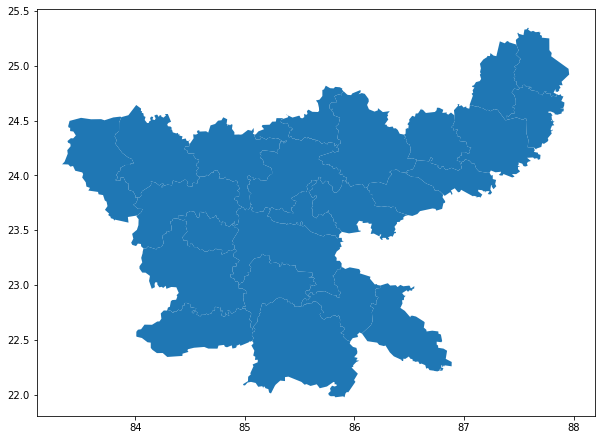

In [ ]:
gdf.plot(figsize=(10,10))

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   dt_code   24 non-null     object  
 2   district  24 non-null     object  
 3   st_code   24 non-null     object  
 4   year      24 non-null     object  
 5   st_nm     24 non-null     object  
 6   geometry  24 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 1.4+ KB


In [ ]:
gdf.head(3)

id dt_code  ...      st_nm                                           geometry
0  None     352  ...  Jharkhand  POLYGON ((87.83974 24.74453, 87.84233 24.74280...
1  None     351  ...  Jharkhand  POLYGON ((87.47815 25.19429, 87.49946 25.13998...
2  None     353  ...  Jharkhand  POLYGON ((87.50946 24.79855, 87.53917 24.80202...

[3 rows x 7 columns]

In [ ]:
jh_dict = dict()
for i in range(len(gdf)):
  jh_dict[gdf.loc[i,'district']] = gdf.loc[i]['dt_code']
jh_dict

{'Bokaro': '355',
 'Chatra': '347',
 'Deoghar': '350',
 'Dhanbad': '354',
 'Dumka': '362',
 'East Singhbhum': '357',
 'Garhwa': '346',
 'Giridih': '349',
 'Godda': '351',
 'Gumla': '366',
 'Hazaribagh': '360',
 'Jamtara': '363',
 'Khunti': '365',
 'Koderma': '348',
 'Latehar': '359',
 'Lohardaga': '356',
 'Pakur': '353',
 'Palamu': '358',
 'Ramgarh': '361',
 'Ranchi': '364',
 'Sahibganj': '352',
 'Saraikela-Kharsawan': '369',
 'Simdega': '367',
 'West Singhbhum': '368'}

In [ ]:
jh_df = pd.read_csv('/content/Jh_dist.csv')

In [ ]:
jh_df.head()

Unnamed: 0  Patient Number  ...      YCord Entry_ID
0           0          1442.0  ...   0.000000      NaN
1           1          2400.0  ...  85.438846      NaN
2           2          3724.0  ...  85.991069      NaN
3           3          4298.0  ...   0.000000      NaN
4          12          5931.0  ...  85.991069      NaN

[5 rows x 25 columns]

In [ ]:
sel_df = jh_df[(jh_df['Date Announced'] > '2020-04-02') & (jh_df['Date Announced'] <= '2020-09-10')]

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [ ]:
# Importing Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [ ]:
geometry = geopandas.points_from_xy(jh_df.YCord, jh_df.XCord)
geo_df = geopandas.GeoDataFrame(jh_df, geometry=geometry)
geo_df.tail()


Unnamed: 0  Patient Number  ...  Entry_ID                   geometry
10836        9546             NaN  ...  527024.0  POINT (86.60673 24.47664)
10837        9545             NaN  ...  527023.0  POINT (85.99107 23.69913)
10838        9576             NaN  ...  527054.0  POINT (86.43096 23.79528)
10839        9559             NaN  ...  527037.0  POINT (85.53692 23.59878)
10840        9575             NaN  ...  527053.0  POINT (86.43096 23.79528)

[5 rows x 26 columns]

In [ ]:
from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

date_dict= dict()
i = 0


In [ ]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

date_dict= dict()
dist_dict = dict()
i = 0
for i,coordinates in enumerate(geo_df_list):
    #print(tuple(coordinates))
    #assign a color marker for the type of volcano, Strato being the most common
    if tuple(coordinates) in date_dict:
      date_dict[tuple(coordinates)] +=1
      
    else:
      date_dict[tuple(coordinates)]  = 1
    dist_dict[tuple(coordinates)] = geo_df.loc[i]['Detected District']

for i,coordinate in enumerate(date_dict):
  #print(coordinate)

  if date_dict[coordinate] >= 500:
    color = 'red'
  elif 200<=date_dict[coordinate] < 500:
    color = 'blue'
  else:
    color = 'green'

  map.add_child(folium.Marker(location = coordinate,
                            popup =
                            "Total Cases: " + str(date_dict[coordinate]) + '<br>' +
                            "District: " +  str(dist_dict[coordinate])+'<br>'
                            "State: " + str(geo_df.loc[2]['Detected State'])+'<br>'+
                            "Coordinates: " + str(coordinate),
                            icon = folium.Icon(color = color)))
map

In [ ]:
wb_df = pd.read_csv('/content/WB_dist.csv')

In [ ]:
geometry = geopandas.points_from_xy(wb_df.YCord, wb_df.XCord)
geo_df = geopandas.GeoDataFrame(wb_df, geometry=geometry)

geo_df.head()


Unnamed: 0  Patient Number  ... Entry_ID                   geometry
0           0           144.0  ...      NaN  POINT (88.35769 22.54142)
1           1           200.0  ...      NaN  POINT (88.39626 22.56286)
2           2           259.0  ...      NaN  POINT (88.66185 22.84467)
3           3           327.0  ...      NaN  POINT (88.39290 22.62111)
4           4           391.0  ...      NaN  POINT (88.35769 22.54142)

[5 rows x 26 columns]

In [ ]:
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

date_dict= dict()
dist_dict = dict()
i = 0
for i,coordinates in enumerate(geo_df_list):
    #print(tuple(coordinates))
    #assign a color marker for the type of volcano, Strato being the most common
    if tuple(coordinates) in date_dict:
      date_dict[tuple(coordinates)] +=1
      
    else:
      date_dict[tuple(coordinates)]  = 1
    dist_dict[tuple(coordinates)] = geo_df.loc[i]['Detected District']

for i,coordinate in enumerate(date_dict):
  #print(coordinate)

  if date_dict[coordinate] >= 500:
    color = 'red'
  elif 200<=date_dict[coordinate] < 500:
    color = 'blue'
  else:
    color = 'green'

  map.add_child(folium.Marker(location = coordinate,
                            popup =
                            "Total Cases: " + str(date_dict[coordinate]) + '<br>' +
                            "District: " +  str(dist_dict[coordinate])+'<br>'
                            "State: " + str(geo_df.loc[2]['Detected State'])+'<br>'+
                            "Coordinates: " + str(coordinate),
                            icon = folium.Icon(color = color)))
map

In [ ]:
geometry = geopandas.points_from_xy(jh_df.YCord, jh_df.XCord)
geo_df = geopandas.GeoDataFrame(jh_df, geometry=geometry)

geo_df.head()

Unnamed: 0  Patient Number  ...  Entry_ID                   geometry
0           0          1442.0  ...       NaN    POINT (0.00000 0.00000)
1           1          2400.0  ...       NaN  POINT (85.43885 23.96752)
2           2          3724.0  ...       NaN  POINT (85.99107 23.69913)
3           3          4298.0  ...       NaN    POINT (0.00000 0.00000)
4          12          5931.0  ...       NaN  POINT (85.99107 23.69913)

[5 rows x 26 columns]

In [ ]:
from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

geometry = geopandas.points_from_xy(jh_df.YCord, jh_df.XCord)
geo_df = geopandas.GeoDataFrame(jh_df, geometry=geometry)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

geometry = geopandas.points_from_xy(wb_df.YCord, wb_df.XCord)
geo_df = geopandas.GeoDataFrame(wb_df, geometry=geometry)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]
heat_data
plugins.HeatMap(heat_data).add_to(map)



In [ ]:
map

In [ ]:
jh_df['Date Announced'] = pd.to_datetime(jh_df['Date Announced'], yearfirst=  True)
jh_df.head()

Unnamed: 0  Patient Number  ...  Active_Case    color
0           0          1442.0  ...            1      NaN
1           1          2400.0  ...            2  #FFEBEB
2           2          3724.0  ...            3  #FFEBEB
3           3          4298.0  ...            4  #FFEBEB
4          12          5931.0  ...            5  #FFEBEB

[5 rows x 29 columns]

In [ ]:
jh_df.info()

In [ ]:
jh_df['Date Announced'].head()

In [ ]:
datetime_index = pd.DatetimeIndex(jh_df['Date Announced'])
#print(datetime_index)
dt_index_epochs = datetime_index.astype(int)//10**9
#print(dt_index_epochs)
dt_index = dt_index_epochs.astype('U10')
dt_index

In [ ]:
styledate = {}
n_periods = len(dt_index)
n_sample = len(dt_index)
record_index = 0

for record in jh_df.index:
  jh_df

In [ ]:
import plotly

import plotly.graph_objs as go


	
import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




In [ ]:
scl = [[0.0, '#ffffff'],[0.2, '#ff9999'],[0.4, '#ff4d4d'], 
       [0.6, '#ff1a1a'],[0.8, '#cc0000'],[1.0, '#4d0000']] # reds

In [ ]:
jh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 10841 non-null  int64         
 1   Patient Number                             760 non-null    float64       
 2   State Patient Number                       0 non-null      float64       
 3   Date Announced                             10841 non-null  datetime64[ns]
 4   Estimated Onset Date                       0 non-null      float64       
 5   Age Bracket                                2 non-null      float64       
 6   Gender                                     7 non-null      object        
 7   Detected City                              33 non-null     object        
 8   Detected District                          10795 non-null  object        
 9   Detected State   

In [ ]:
jh_df['District_Id'] = jh_df['Detected District'].map(jh_dict)

In [ ]:
jh_df.tail(50)

Unnamed: 0  Patient Number  ...  Active_Case    color
10791        9541             NaN  ...          454  #D85766
10792        9542             NaN  ...          453  #D85766
10793        9543             NaN  ...          452  #D85766
10794        9539             NaN  ...          451  #D85766
10795        9533             NaN  ...          452  #D85766
10796        9523             NaN  ...          453  #D85766
10797        9531             NaN  ...          454  #D85766
10798        9532             NaN  ...          455  #D85766
10799        9520             NaN  ...          456  #D85766
10800        9521             NaN  ...          457  #D85766
10801        9524             NaN  ...          458  #D85766
10802        9525             NaN  ...          459  #D85766
10803        9522             NaN  ...          460  #D85766
10804        9527             NaN  ...          461  #D85766
10805        9528             NaN  ...          462  #D85766
10806        9529             NaN  ...          463  #D85766
10807        9530             NaN  ...          464  #D85766
10808        9526             NaN  ...          465  #D85766
10809        9566             NaN  ...          464  #D85766
10810        9562             NaN  ...          465  #D85766
10811        9563             NaN  ...          466  #D85766
10812        9564             NaN  ...          465  #D85766
10813        9565             NaN  ...          464  #D85766
10814        9567             NaN  ...          463  #D85766
10815        9572             NaN  ...          462  #D85766
10816        9569             NaN  ...          461  #D85766
10817        9570             NaN  ...          460  #D85766
10818        9571             NaN  ...          459  #D85766
10819        9561             NaN  ...          460  #D85766
10820        9573             NaN  ...          459  #D85766
10821        9574             NaN  ...          458  #D85766
10822        9568             NaN  ...          457  #D85766
10823        9560             NaN  ...          458  #D85766
10824        9554             NaN  ...          459  #D85766
10825        9558             NaN  ...          460  #D85766
10826        9557             NaN  ...          461  #D85766
10827        9556             NaN  ...          462  #D85766
10828        9555             NaN  ...          463  #D85766
10829        9553             NaN  ...          464  #D85766
10830        9552             NaN  ...          465  #D85766
10831        9551             NaN  ...          466  #D85766
10832        9550             NaN  ...          467  #D85766
10833        9549             NaN  ...          468  #D85766
10834        9548             NaN  ...          469  #D85766
10835        9547             NaN  ...          470  #D85766
10836        9546             NaN  ...          471  #D85766
10837        9545             NaN  ...          472  #D85766
10838        9576             NaN  ...          471  #D85766
10839        9559             NaN  ...          472  #D85766
10840        9575             NaN  ...          473  #D85766

[50 rows x 29 columns]

In [ ]:
jh_df.District_Id.unique()

array(['364', '360', '355', '348', '349', '367', '354', '350', '346',
       '358', '363', '351', '362', '357', '359', nan, '361', '356', '368',
       '369', '366', '347', '365', '353', '352'], dtype=object)

In [ ]:
type(jh_df.District_Id[0])

str

In [ ]:
jh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Unnamed: 0                                 10841 non-null  int64         
 1   Patient Number                             760 non-null    float64       
 2   State Patient Number                       0 non-null      float64       
 3   Date Announced                             10841 non-null  datetime64[ns]
 4   Estimated Onset Date                       0 non-null      float64       
 5   Age Bracket                                2 non-null      float64       
 6   Gender                                     7 non-null      object        
 7   Detected City                              33 non-null     object        
 8   Detected District                          10795 non-null  object        
 9   Detected State   

In [ ]:
print(jh_df['Current Status'].unique())


['Hospitalized' 'Recovered' 'Deceased']


In [ ]:


active = 0
jh_df['Active_Case'] = active
for i in range(len(jh_df)):
 
    
  if jh_df.loc[i]['Current Status'] == 'Hospitalized':
    active+=1
    

  else:
    active-=1
  jh_df.loc[i,['Active_Case']] = active
    

In [ ]:
jh_df.tail(5)

Unnamed: 0  Patient Number  ...  Active_Case    color
10836        9546             NaN  ...          471  #D85766
10837        9545             NaN  ...          472  #D85766
10838        9576             NaN  ...          471  #D85766
10839        9559             NaN  ...          472  #D85766
10840        9575             NaN  ...          473  #D85766

[5 rows x 29 columns]

In [ ]:
jh_df.Active_Case.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
bins=np.linspace(min(jh_df['Active_Case']),max(jh_df['Active_Case']),11)
bins

array([  1. ,  75.6, 150.2, 224.8, 299.4, 374. , 448.6, 523.2, 597.8,
       672.4, 747. ])

In [ ]:

# Coloring states and UTs with active COVID-19 cases
jh_df['color']=pd.cut(jh_df['Active_Case'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)
# Coloring states and UTs with no active cases but previously had
jh_df['color'].replace(np.nan,'#32CD32',inplace=True)

In [ ]:
jh_df['Date Announced'] = pd.to_datetime(jh_df['Date Announced'], yearfirst=  True)
jh_dff = jh_df[['Date Announced','District_Id','color']]
jh_dff['Date Announced'] = pd.to_datetime(jh_dff['Date Announced'], yearfirst=  True)
print(jh_dff.info())
jh_dff['Date Announced'] = (jh_df['Date Announced'].astype(int)//10**9).astype('U10')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Announced  10841 non-null  datetime64[ns]
 1   District_Id     10793 non-null  object        
 2   color           10840 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 180.5+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

jh_dff.sort_values('Date Announced', inplace = True)
jh_dff.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date Announced District_Id    color
0      1585612800         364      NaN
1      1585785600         360  #FFEBEB
2      1586044800         355  #FFEBEB
3      1586131200         364  #FFEBEB
12     1586390400         364  #FFEBEB

In [ ]:
jh_dff = jh_dff[jh_dff['District_Id'].notna()]
jh_dff.District_Id.unique()

array(['364', '360', '355', '348', '349', '367', '354', '350', '346',
       '358', '363', '351', '362', '357', '359', '361', '356', '368',
       '366', '369', '347', '365', '353', '352'], dtype=object)

In [ ]:
covid_dict = {}
for i in jh_dff['District_Id'].unique():
  covid_dict[i] = {}
  for j in jh_dff[jh_dff['District_Id'] == i].set_index(['District_Id']).values:
    covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}

In [ ]:
list(covid_dict.items())[10]

('363',
 {'1587945600': {'color': '#F8D2D4', 'opacity': 0.7},
  '1588118400': {'color': '#F8D2D4', 'opacity': 0.7},
  '1589760000': {'color': '#F8D2D4', 'opacity': 0.7},
  '1591488000': {'color': '#EBA1A8', 'opacity': 0.7},
  '1591574400': {'color': '#E58892', 'opacity': 0.7},
  '1592438400': {'color': '#E58892', 'opacity': 0.7},
  '1592524800': {'color': '#E58892', 'opacity': 0.7},
  '1592611200': {'color': '#E58892', 'opacity': 0.7},
  '1593388800': {'color': '#DE6F7C', 'opacity': 0.7},
  '1593561600': {'color': '#DE6F7C', 'opacity': 0.7},
  '1594252800': {'color': '#D85766', 'opacity': 0.7},
  '1594425600': {'color': '#D85766', 'opacity': 0.7},
  '1594598400': {'color': '#D85766', 'opacity': 0.7},
  '1594684800': {'color': '#D85766', 'opacity': 0.7},
  '1594771200': {'color': '#D13E50', 'opacity': 0.7},
  '1594857600': {'color': '#D13E50', 'opacity': 0.7},
  '1594944000': {'color': '#D13E50', 'opacity': 0.7},
  '1595030400': {'color': '#D13E50', 'opacity': 0.7},
  '1595376000': {'co

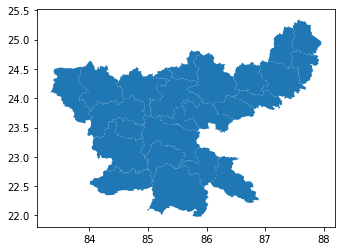

In [ ]:
shapefile = '/content/jharkhand (1).json'
gdf = gpd.read_file(shapefile)
gdf.plot()

In [ ]:
gdf.head(1)

id dt_code  ...      st_nm                                           geometry
0  None     352  ...  Jharkhand  POLYGON ((87.83974 24.74453, 87.84233 24.74280...

[1 rows x 7 columns]

In [ ]:
jh_dict

{'Bokaro': '355',
 'Chatra': '347',
 'Deoghar': '350',
 'Dhanbad': '354',
 'Dumka': '362',
 'East Singhbhum': '357',
 'Garhwa': '346',
 'Giridih': '349',
 'Godda': '351',
 'Gumla': '366',
 'Hazaribagh': '360',
 'Jamtara': '363',
 'Khunti': '365',
 'Koderma': '348',
 'Latehar': '359',
 'Lohardaga': '356',
 'Pakur': '353',
 'Palamu': '358',
 'Ramgarh': '361',
 'Ranchi': '364',
 'Sahibganj': '352',
 'Saraikela-Kharsawan': '369',
 'Simdega': '367',
 'West Singhbhum': '368'}

In [ ]:

#gdf.plot()
#gdf[["dt_code"]] = gdf[['dt_code']].apply(pd.to_numeric)
gdf.info()
#print(gdf.columns)

#gdf['District_Id'] = gdf['dt_code'].map(jh_dict)
#gdf.drop(columns='dt_code', inplace= True)

gdf.drop(['id', 'district','st_code','year','st_nm'], inplace= True, axis=1)
#gdf.drop(['ID_0'],inplace=True)
gdf = gdf[['geometry','dt_code']]
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   dt_code   24 non-null     object  
 2   district  24 non-null     object  
 3   st_code   24 non-null     object  
 4   year      24 non-null     object  
 5   st_nm     24 non-null     object  
 6   geometry  24 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 1.4+ KB


geometry dt_code
0  POLYGON ((87.83974 24.74453, 87.84233 24.74280...     352
1  POLYGON ((87.47815 25.19429, 87.49946 25.13998...     351
2  POLYGON ((87.50946 24.79855, 87.53917 24.80202...     353
3  POLYGON ((86.45277 24.37248, 86.45664 24.37191...     349
4  POLYGON ((87.05198 24.62726, 87.05489 24.63939...     362

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  24 non-null     geometry
 1   dt_code   24 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 512.0+ bytes


In [ ]:



fig=Figure(height=850,width=1000)
m= folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
fig.add_child(m)

g = TimeSliderChoropleth(
    gdf.set_index('dt_code').to_json(),
    styledict=covid_dict
).add_to(m)
m

In [ ]:
gdf = gpd.read_file('/content/westbengal.json')
gdf.info()
gdf.head()
gdf.plot()

In [ ]:
wb_df = pd.read_csv('/content/WB_dist.csv')
wb_dict = dict()
for i in range(len(gdf)):
  wb_dict[gdf.loc[i,'district']] = gdf.loc[i]['dt_code']
print(wb_dict)

datetime_index = pd.DatetimeIndex(wb_df['Date Announced'])
#print(datetime_index)
dt_index_epochs = datetime_index.astype(int)//10**9
#print(dt_index_epochs)
dt_index = dt_index_epochs.astype('U10')
dt_index

wb_df['District_Id'] = wb_df['Detected District'].map(wb_dict)
wb_df.head()





{'South 24 Parganas': '343', 'Paschim Medinipur': '344', 'Purba Medinipur': '345', 'Jhargram': '776', 'Darjeeling': '327', 'Jalpaiguri': '328', 'Dakshin Dinajpur': '331', 'Malda': '332', 'Murshidabad': '333', 'Birbhum': '334', 'Nadia': '336', 'Purba Bardhaman': '335', 'Purulia': '340', 'Bankura': '339', 'North 24 Parganas': '337', 'Hooghly': '338', 'Howrah': '341', 'Kolkata': '342', 'Alipurduar': '774', 'Paschim Bardhaman': '777', 'Kalimpong': '775', 'Cooch Behar': '329', 'Uttar Dinajpur': '330'}


Unnamed: 0  Patient Number  ... Entry_ID District_Id
0           0           144.0  ...      NaN         342
1           1           200.0  ...      NaN         342
2           2           259.0  ...      NaN         337
3           3           327.0  ...      NaN         342
4           4           391.0  ...      NaN         342

[5 rows x 26 columns]

In [ ]:
wb_df['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased'], dtype=object)

In [ ]:


active = 0
wb_df['Active_Case'] = active
for i in range(len(wb_df)):
 
    
  if wb_df.loc[i]['Current Status'] == 'Hospitalized':
    active+=1
    

  else:
    active-=1
  #print(active)
  wb_df.loc[i,['Active_Case']] = active
    

In [ ]:
bins=np.linspace(min(wb_df['Active_Case']),max(wb_df['Active_Case']),11)
bins
wb_df['Date Announced'] = pd.to_datetime(wb_df['Date Announced'], yearfirst=  True)
wb_df.head()

# Coloring states and UTs with active COVID-19 cases
wb_df['color']=pd.cut(wb_df['Active_Case'],bins,labels=['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'],include_lowest=False)
# Coloring states and UTs with no active cases but previously had
wb_df['color'].replace(np.nan,'#32CD32',inplace=True)

wb_dff = wb_df[['Date Announced','District_Id','color']]
wb_dff['Date Announced'] = pd.to_datetime(wb_dff['Date Announced'], yearfirst=  True)
print(wb_dff.info())
wb_dff['Date Announced'] = (wb_df['Date Announced'].astype(int)//10**9).astype('U10')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16863 entries, 0 to 16862
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Announced  16863 non-null  datetime64[ns]
 1   District_Id     16201 non-null  object        
 2   color           16861 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 280.5+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
wb_dff.sort_values('Date Announced', inplace = True)
wb_dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16863 entries, 0 to 16862
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Date Announced  16863 non-null  object  
 1   District_Id     16201 non-null  object  
 2   color           16861 non-null  category
dtypes: category(1), object(2)
memory usage: 412.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
wb_dff = wb_dff[wb_dff['District_Id'].notna()]
wb_dff.District_Id.unique()

array(['342', '337', '336', '345', '775', '338', '341', '343', '332',
       '344', '334', '335', '327', '777', '328', '333', '330', '776',
       '331', '339', '340', '774', '329'], dtype=object)

In [ ]:
covid_dict = {}
for i in wb_dff['District_Id'].unique():
  covid_dict[i] = {}
  for j in wb_dff[wb_dff['District_Id'] == i].set_index(['District_Id']).values:
    covid_dict[i][j[0]]={'color':j[1],'opacity':0.7}
covid_dict

{'327': {'1588464000': {'color': '#C50D24', 'opacity': 0.7},
  '1588636800': {'color': '#C50D24', 'opacity': 0.7},
  '1589846400': {'color': '#C50D24', 'opacity': 0.7},
  '1589932800': {'color': '#C50D24', 'opacity': 0.7},
  '1590364800': {'color': '#C50D24', 'opacity': 0.7},
  '1590451200': {'color': '#C50D24', 'opacity': 0.7},
  '1590537600': {'color': '#C50D24', 'opacity': 0.7},
  '1590624000': {'color': '#C50D24', 'opacity': 0.7},
  '1590710400': {'color': '#C50D24', 'opacity': 0.7},
  '1590796800': {'color': '#C50D24', 'opacity': 0.7},
  '1590969600': {'color': '#C50D24', 'opacity': 0.7},
  '1591056000': {'color': '#C50D24', 'opacity': 0.7},
  '1591142400': {'color': '#C50D24', 'opacity': 0.7},
  '1591228800': {'color': '#C50D24', 'opacity': 0.7},
  '1591315200': {'color': '#C50D24', 'opacity': 0.7},
  '1591401600': {'color': '#C50D24', 'opacity': 0.7},
  '1591488000': {'color': '#C50D24', 'opacity': 0.7},
  '1591574400': {'color': '#C50D24', 'opacity': 0.7},
  '1591660800': {'col

In [ ]:
gdf = gpd.read_file('/content/westbengal.json')
#gdf.plot()
#gdf[["dt_code"]] = gdf[['dt_code']].apply(pd.to_numeric)
gdf.info()
#print(gdf.columns)

#gdf['District_Id'] = gdf['dt_code'].map(jh_dict)
#gdf.drop(columns='dt_code', inplace= True)

gdf.drop(['id', 'district','st_code','year','st_nm'], inplace= True, axis=1)
#gdf.drop(['ID_0'],inplace=True)
gdf = gdf[['geometry','dt_code']]
gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   dt_code   23 non-null     object  
 2   district  23 non-null     object  
 3   st_nm     23 non-null     object  
 4   st_code   23 non-null     object  
 5   year      23 non-null     object  
 6   geometry  23 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 1.4+ KB


geometry dt_code
0  MULTIPOLYGON (((88.05086 21.50906, 88.04493 21...     343
1  POLYGON ((87.52298 22.92793, 87.52265 22.91700...     344
2  POLYGON ((87.43825 21.79078, 87.42572 21.79707...     345
3  POLYGON ((87.07622 22.72566, 87.07622 22.72566...     776
4  POLYGON ((88.41289 27.02563, 88.42212 27.00941...     327

In [ ]:


fig6=Figure(height=850,width=1300)
m6 = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
fig6.add_child(m6)

g = TimeSliderChoropleth(
    gdf.set_index('dt_code').to_json(),
    styledict=covid_dict
).add_to(m6)
m6

In [ ]:
wb_df.to_csv('x.csv')

In [ ]:

wb_df.Active_Case.unique()

array([   -1,     0,    -2, ..., -1988, -1989, -1990])

In [ ]:
styledate = {}
n_periods = len(dt_index)
n_sample = len(dt_index)
record_index = 0

In [ ]:
wb_df['Date Announced'] = pd.to_datetime(wb_df['Date Announced'], yearfirst=  True)
wb_df.head()

In [ ]:
jh_df.head()

In [ ]:
wb_df['District_Id'] = wb_df['Detected District'].map(wb_dict)
wb_df.District_Id.unique()

In [ ]:
wb_df.head(5)

In [ ]:
wb_df.head(50)

In [ ]:
for i in range(len(wb_df)):
  if isinstance(wb_df.loc[i]['District_Id'], float):
    print(wb_df.loc[i]['Detected District'], wb_df.loc[i]['District_Id'])
  